In [1]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from main import parse_config, instantiate_agents, instantiate_auction
from tqdm.notebook import tqdm

In [2]:
# Parse configuration file
rng, config, agent_configs, agents2items, agents2item_values,\
num_runs, max_slots, embedding_size, embedding_var,\
obs_embedding_size = parse_config('../config/FP_DM_TS.json')

In [3]:
# Instantiate Agent and Auction objects
agents = instantiate_agents(rng, agent_configs, agents2item_values, agents2items)
# bid = value * estimated_CTR * gamma
# Instantiate Auction object
auction, num_iter, rounds_per_iter, output_dir =\
    instantiate_auction(rng,
                        config,
                        agents2items,
                        agents2item_values,
                        agents,
                        max_slots,
                        embedding_size,
                        embedding_var,
                        obs_embedding_size)

  0%|          | 0/3 [00:00<?, ?it/s]

number of iteration: 0

agent: 0




DM (policy) 1:  32%|███▏      | 5287/16384 [00:01<00:03, 3323.71it/s]
/Users/keithwu/Documents/GitHub/auction-gym/src/Models.py:44: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3281.)
  P = (1 + torch.exp(1 - X.matmul(self.m[item, :].T))) ** (-1)


Stopping at Epoch 5287



DM (policy) 1: 100%|██████████| 32768/32768 [00:08<00:00, 3760.58it/s]


AUC predicting P(win):				 0.693511398420768



DM (policy) 1:  29%|██▉       | 4822/16384 [00:06<00:15, 765.76it/s]


Stopping at Epoch 4822
agent: 1




DM (policy) 2:  39%|███▉      | 6361/16384 [00:01<00:02, 3553.92it/s]


Stopping at Epoch 6361



DM (policy) 2: 100%|██████████| 32768/32768 [00:08<00:00, 3858.90it/s]


AUC predicting P(win):				 0.8451951072770254



DM (policy) 2:  29%|██▊       | 4703/16384 [00:06<00:15, 733.53it/s]


Stopping at Epoch 4703
agent: 2




DM (policy) 3:  32%|███▏      | 5278/16384 [00:01<00:03, 2852.43it/s]


Stopping at Epoch 5278



DM (policy) 3: 100%|██████████| 32768/32768 [00:08<00:00, 3880.42it/s]


AUC predicting P(win):				 0.925661839425791



DM (policy) 3:  16%|█▌        | 2625/16384 [00:03<00:18, 735.03it/s]


Stopping at Epoch 2625
number of iteration: 1

agent: 0




DM (policy) 1:  34%|███▍      | 5592/16384 [00:02<00:04, 2611.80it/s]


Stopping at Epoch 5592



DM (policy) 1:  28%|██▊       | 9121/32768 [00:02<00:05, 3949.75it/s]


Epoch 08508: reducing learning rate of group 0 to 3.0000e-04.
Epoch 08610: reducing learning rate of group 0 to 3.0000e-05.
Epoch 08711: reducing learning rate of group 0 to 3.0000e-06.
Epoch 08812: reducing learning rate of group 0 to 3.0000e-07.
Epoch 08913: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 9121
AUC predicting P(win):				 0.5727165351945818



DM (policy) 1:  11%|█         | 1797/16384 [00:02<00:19, 744.65it/s]


Stopping at Epoch 1797
agent: 1




DM (policy) 2:  10%|▉         | 1622/16384 [00:00<00:03, 4454.40it/s]


Stopping at Epoch 1622



DM (policy) 2:  15%|█▌        | 4980/32768 [00:01<00:07, 3926.23it/s]


Epoch 04366: reducing learning rate of group 0 to 3.0000e-04.
Epoch 04468: reducing learning rate of group 0 to 3.0000e-05.
Epoch 04569: reducing learning rate of group 0 to 3.0000e-06.
Epoch 04670: reducing learning rate of group 0 to 3.0000e-07.
Epoch 04771: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 4980
AUC predicting P(win):				 0.71082466741261



DM (policy) 2:   4%|▍         | 708/16384 [00:00<00:21, 736.72it/s]


Stopping at Epoch 708
agent: 2




DM (policy) 3:  29%|██▉       | 4712/16384 [00:01<00:04, 2847.98it/s]


Stopping at Epoch 4712



DM (policy) 3:  90%|█████████ | 29511/32768 [00:07<00:00, 3808.24it/s]


Epoch 28909: reducing learning rate of group 0 to 3.0000e-04.
Epoch 29011: reducing learning rate of group 0 to 3.0000e-05.
Epoch 29112: reducing learning rate of group 0 to 3.0000e-06.
Epoch 29213: reducing learning rate of group 0 to 3.0000e-07.
Epoch 29314: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 29511
AUC predicting P(win):				 0.9372655171791172



DM (policy) 3:  13%|█▎        | 2122/16384 [00:02<00:19, 723.85it/s]


Stopping at Epoch 2122
number of iteration: 2

agent: 0




DM (policy) 1:   7%|▋         | 1135/16384 [00:00<00:05, 2724.70it/s]


Stopping at Epoch 1135



DM (policy) 1:  48%|████▊     | 15772/32768 [00:04<00:04, 3909.08it/s]


Epoch 15141: reducing learning rate of group 0 to 3.0000e-04.
Epoch 15243: reducing learning rate of group 0 to 3.0000e-05.
Epoch 15344: reducing learning rate of group 0 to 3.0000e-06.
Epoch 15445: reducing learning rate of group 0 to 3.0000e-07.
Epoch 15546: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 15772
AUC predicting P(win):				 0.7560523474268559



DM (policy) 1:  12%|█▏        | 2006/16384 [00:02<00:20, 713.99it/s]


Stopping at Epoch 2006
agent: 1




DM (policy) 2:   6%|▋         | 1025/16384 [00:00<00:04, 3466.64it/s][A


Stopping at Epoch 1025



DM (policy) 2:  29%|██▉       | 9501/32768 [00:02<00:05, 3955.82it/s]


Epoch 08886: reducing learning rate of group 0 to 3.0000e-04.
Epoch 08988: reducing learning rate of group 0 to 3.0000e-05.
Epoch 09089: reducing learning rate of group 0 to 3.0000e-06.
Epoch 09190: reducing learning rate of group 0 to 3.0000e-07.
Epoch 09291: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 9501
AUC predicting P(win):				 0.774554632558661



DM (policy) 2:   8%|▊         | 1305/16384 [00:01<00:20, 742.54it/s]


Stopping at Epoch 1305
agent: 2




DM (policy) 3:   6%|▋         | 1025/16384 [00:00<00:04, 3226.81it/s][A


Stopping at Epoch 1025



DM (policy) 3:   8%|▊         | 2586/32768 [00:00<00:07, 3808.71it/s]


Epoch 01935: reducing learning rate of group 0 to 3.0000e-04.
Epoch 02091: reducing learning rate of group 0 to 3.0000e-05.
Epoch 02192: reducing learning rate of group 0 to 3.0000e-06.
Epoch 02293: reducing learning rate of group 0 to 3.0000e-07.
Epoch 02394: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 2586
AUC predicting P(win):				 0.8272940849859396



DM (policy) 3:   4%|▍         | 693/16384 [00:00<00:21, 730.08it/s]


Stopping at Epoch 693


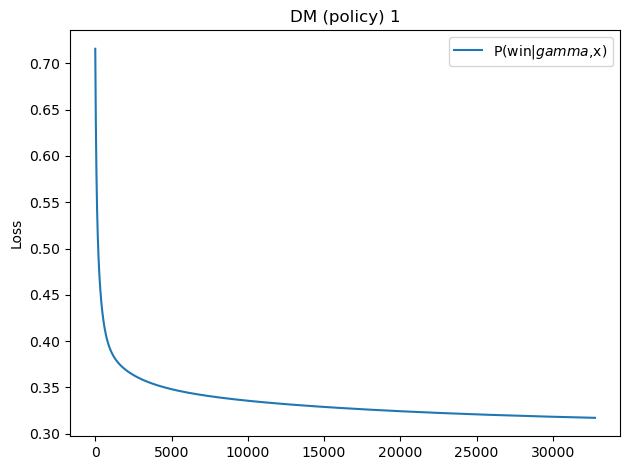

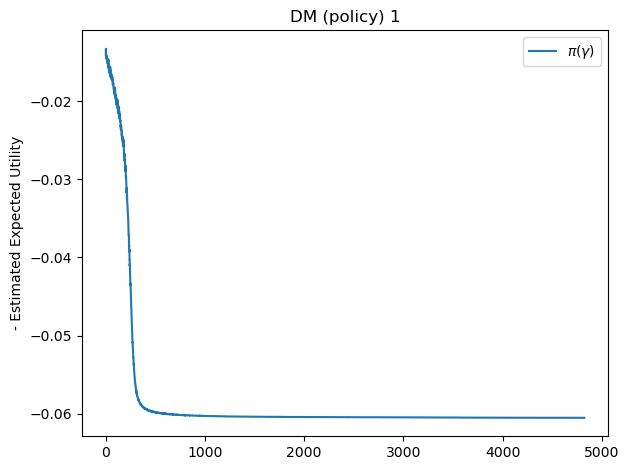

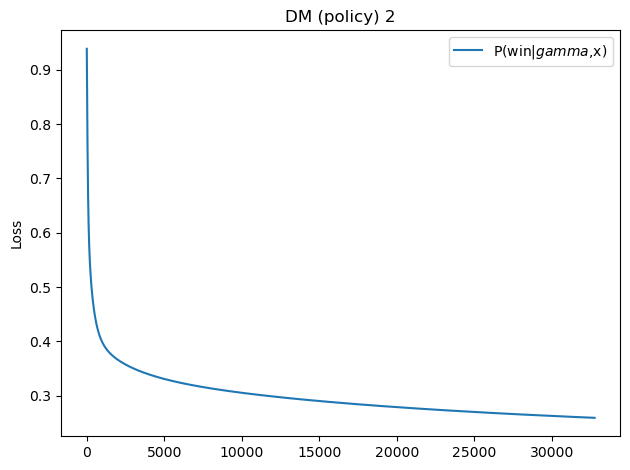

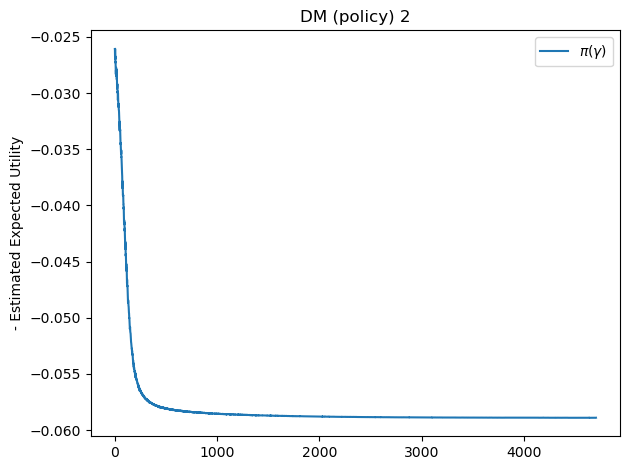

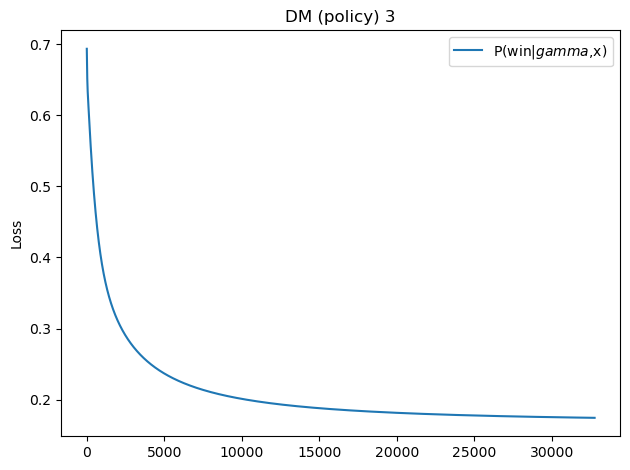

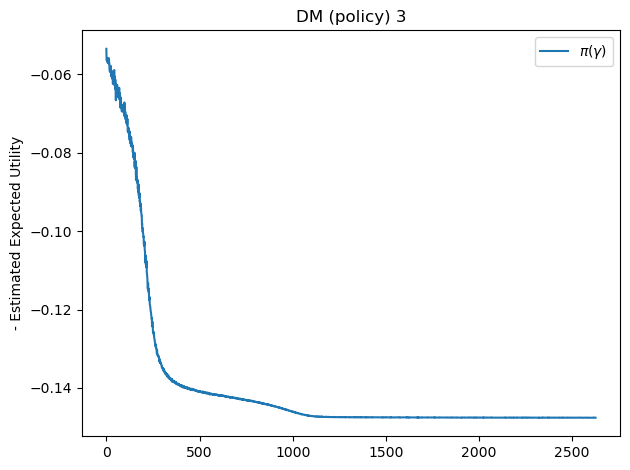

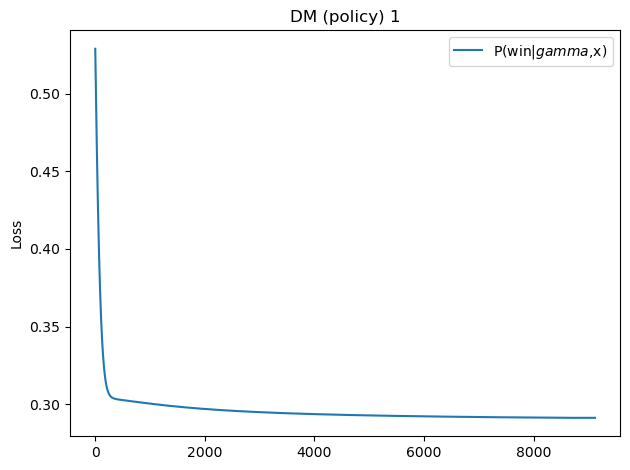

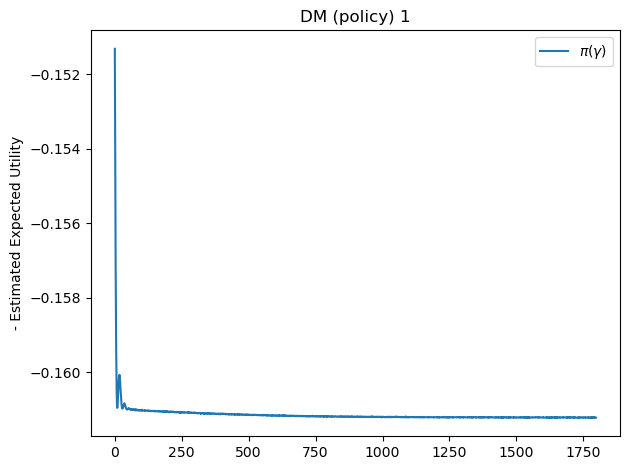

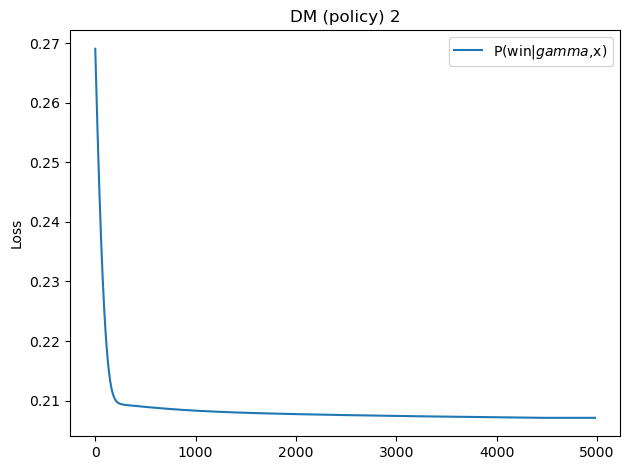

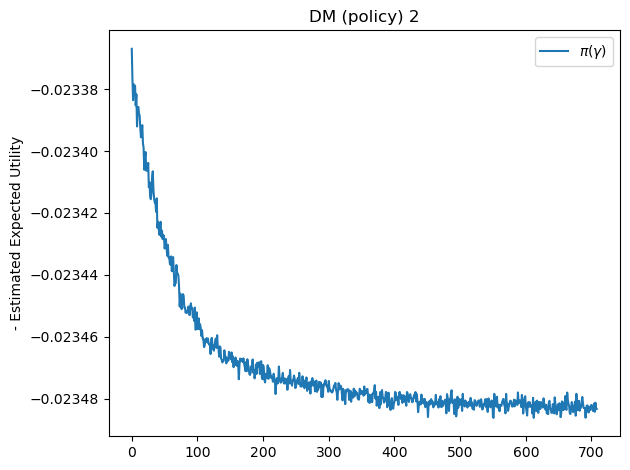

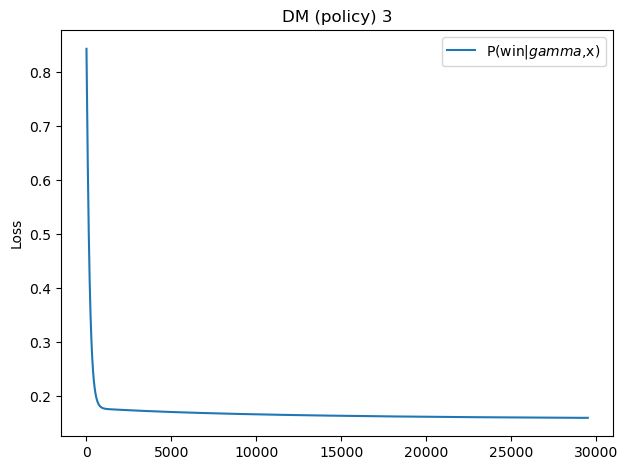

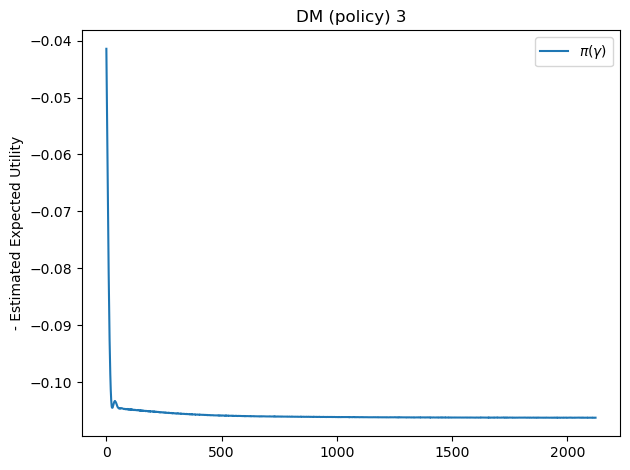

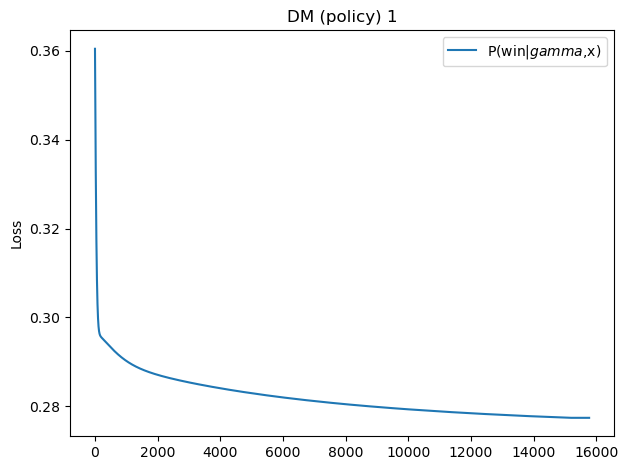

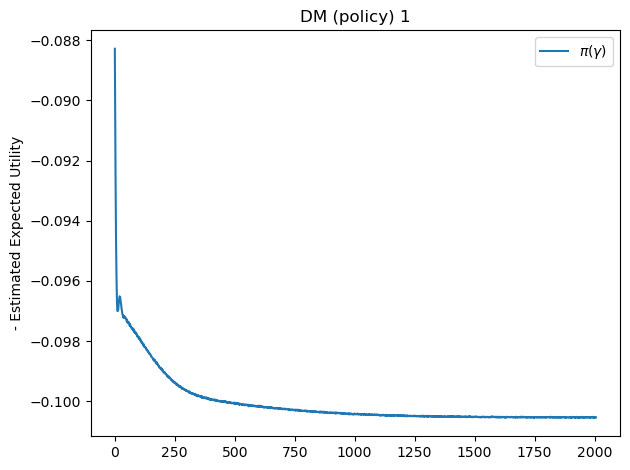

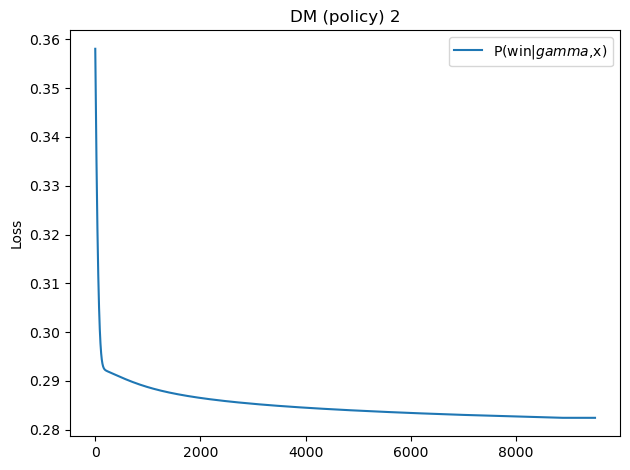

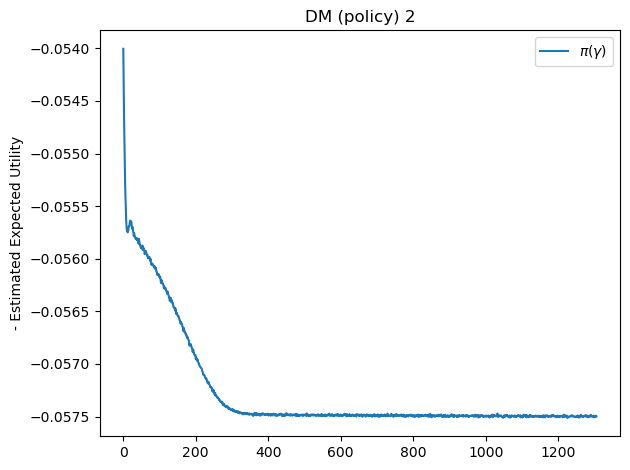

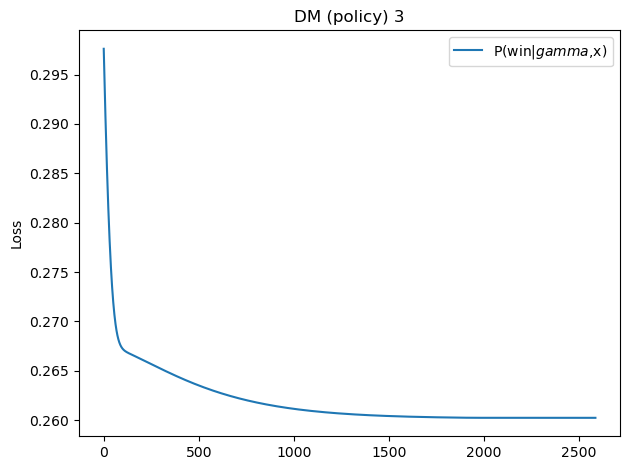

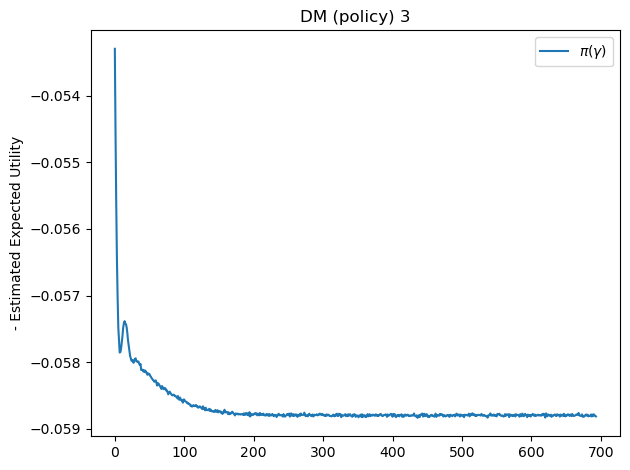

In [4]:
# Placeholders for output
auction_revenue = []
social_welfare = []
social_surplus = []
# Run repeated auctions
# This logic is encoded in the `simulation_run()` method in main.py
for i in tqdm(range(num_iter)):
    print( f'number of iteration: {i}\n')
    # Simulate impression opportunities
    for _ in range(rounds_per_iter):
        auction.simulate_opportunity()

    # Log 'Gross utility' or welfare
    social_welfare.append(sum([agent.gross_utility for agent in auction.agents]))

    # Log 'Net utility' or surplus
    social_surplus.append(sum([agent.net_utility for agent in auction.agents]))

    # Update agents (does nothing in this example, as we have truthful oracles)
    # Clear running metrics
    for agent_id, agent in enumerate(auction.agents):
        print(f'agent: {agent_id}\n' )
        agent.update(iteration=i)
        agent.clear_utility()
        agent.clear_logs()

    # Log revenue
    auction_revenue.append(auction.revenue)
    auction.clear_revenue()

# Rescale metrics per auction round
auction_revenue = np.array(auction_revenue) / rounds_per_iter
social_welfare = np.array(social_welfare) / rounds_per_iter
social_surplus = np.array(social_surplus) / rounds_per_iter

In [5]:
# data generation
# just take the first agent's data (dont know is it correct)
# Q2 the bidder updates seems does not use the utilities but the estimated_CTRs instead
# it seems to only use the utilities to calculate the welfare and surplu
# Input: context
# Action: bid/ gamma
# Output: reward
trained_welfare = {}
trained_surplus = {}
trained_data = {}
val_data = {}
test_data = {}
num_data = [7000, 2000, 1000]

for i, data in enumerate([trained_data, val_data, test_data]):
    for _ in range(num_data[i]):
        auction.simulate_opportunity()
    for agent_id, agent in enumerate(auction.agents):
        contexts = np.array(list(opp.context for opp in agent.logs))
        bids = np.array(list(opp.bid for opp in agent.logs))
        prices = np.array(list(opp.price for opp in agent.logs))
        values = np.array(list(opp.value for opp in agent.logs))
        outcomes = np.array(list(opp.outcome for opp in agent.logs))
        won_mask = np.array(list(opp.won for opp in agent.logs))
        estimated_CTRs = np.array(list(opp.estimated_CTR for opp in agent.logs))
        gammas = np.array(agent.bidder.gammas)
        utilities = np.zeros_like(values)
        utilities[won_mask] = (values[won_mask] * outcomes[won_mask]) - prices[won_mask]
        data[agent_id] = np.hstack((contexts, estimated_CTRs.reshape(-1, 1),values.reshape(-1, 1), bids.reshape(-1, 1), gammas.reshape(-1,1), utilities.reshape(-1, 1)))
        agent.clear_utility()
        agent.clear_logs()
        # may consider including estimated_CTRs as input features as well
    auction.clear_revenue()

In [6]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [7]:
def gridSearch(model, param_grid, input_data, output_data):
    grid_cv = GridSearchCV(model, param_grid, cv=5, n_jobs=-1).fit(input_data, output_data)
    print("Param for GS", grid_cv.best_params_)
    print("CV score for GS", grid_cv.best_score_)
    return grid_cv.best_estimator_

In [8]:
param_grid = {
    'max_depth': [3, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10, 15]
}
model = tree.DecisionTreeRegressor()
# should I set random state here?
# mb k-fold is not nesscary here
# input_data = np.hstack((trained_data[0][:, :5], trained_data[0][:, 5].reshape(-1, 1)))

In [9]:
# context with bid
for agent_id in trained_data.keys():
    input_train_data = trained_data[agent_id][:, :5]
    label_train_data = trained_data[agent_id][:, 7]
    print("Agent", agent_id)
    best_estimator = gridSearch(model, param_grid, input_train_data, label_train_data)
    input_test_data = test_data[agent_id][:, :5]
    label_test_data = test_data[agent_id][:, 7]
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds =best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))

# cv fault is 5

Agent 0
Param for GS {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 2}
CV score for GS 0.8639191128560061
Test R2 score: 0.8645499398426056
Train MSE:  0.0007306870469921774
Test MSE:  0.002395683077391878
Agent 1
Param for GS {'max_depth': 15, 'min_samples_leaf': 10, 'min_samples_split': 2}
CV score for GS 0.7028148004374897
Test R2 score: 0.7040580600050846
Train MSE:  0.0031129841043404305
Test MSE:  0.005301778084897266
Agent 2
Param for GS {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 2}
CV score for GS 0.850666772447928
Test R2 score: 0.849585671931249
Train MSE:  0.0007812613219821731
Test MSE:  0.0022585459500784485


In [10]:
# context with gamma
for agent_id in trained_data.keys():
    input_train_data = trained_data[agent_id][:, :5]
    label_train_data = trained_data[agent_id][:, 8]
    print("Agent", agent_id)
    best_estimator = gridSearch(model, param_grid, input_train_data, label_train_data)
    input_test_data = test_data[agent_id][:, :5]
    label_test_data = test_data[agent_id][:, 8]
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds =best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))

Agent 0
Param for GS {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 10}
CV score for GS 0.8385008220037455
Test R2 score: 0.8407685865675729
Train MSE:  0.0006496727951056531
Test MSE:  0.0022536302468574767
Agent 1
Param for GS {'max_depth': 15, 'min_samples_leaf': 10, 'min_samples_split': 2}
CV score for GS 0.6528005528682634
Test R2 score: 0.6813368900657799
Train MSE:  0.0018041033015898347
Test MSE:  0.0029555866058357484
Agent 2
Param for GS {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 10}
CV score for GS 0.8515510596706187
Test R2 score: 0.8392131879223406
Train MSE:  0.0009975086653575954
Test MSE:  0.003073507140314886


In [11]:
# estimated_CTR and value with bid
for agent_id in trained_data.keys():
    input_train_data = trained_data[agent_id][:, 5:7]
    label_train_data = trained_data[agent_id][:, 7]
    print("Agent", agent_id)
    best_estimator = gridSearch(model, param_grid, input_train_data, label_train_data)
    input_test_data = test_data[agent_id][:, 5:7]
    label_test_data = test_data[agent_id][:, 7]
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds =best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))

Agent 0
Param for GS {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
CV score for GS 0.997464257767315
Test R2 score: 0.9977732999096449
Train MSE:  1.7859535817045202e-05
Test MSE:  3.9383280588373254e-05
Agent 1
Param for GS {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
CV score for GS 0.997910580982427
Test R2 score: 0.9978988867021998
Train MSE:  1.4794237273398896e-05
Test MSE:  3.7641290167776574e-05
Agent 2
Param for GS {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
CV score for GS 0.9973681127490372
Test R2 score: 0.9967183793060721
Train MSE:  2.050573564871453e-05
Test MSE:  4.92751669546856e-05


In [12]:
# estimated_CTR and value with gamma
for agent_id in trained_data.keys():
    input_train_data = trained_data[agent_id][:, 5:7]
    label_train_data = trained_data[agent_id][:, 8]
    print("Agent", agent_id)
    best_estimator = gridSearch(model, param_grid, input_train_data, label_train_data)
    input_test_data = test_data[agent_id][:, 5:7]
    label_test_data = test_data[agent_id][:, 8]
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds =best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))

Agent 0
Param for GS {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
CV score for GS 0.9899609507011731
Test R2 score: 0.9918362962401978
Train MSE:  9.484421140735846e-05
Test MSE:  0.00011554233755063695
Agent 1
Param for GS {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
CV score for GS 0.9861882562278153
Test R2 score: 0.9872870013306174
Train MSE:  9.694977949029236e-05
Test MSE:  0.00011791251455178255
Agent 2
Param for GS {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 15}
CV score for GS 0.994131372528174
Test R2 score: 0.9939636142524255
Train MSE:  6.504907235135002e-05
Test MSE:  0.00011538803747103455
